In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin
from sklearn.decomposition import FastICA
from STIMD import STIMD

In [2]:
## Example of STIMD
np.random.seed(1)

N = 1024 # Number of samples
t = np.linspace(0,1,N)

# These are the "true" signals
s1 = cos(20*pi*t-5*sin(pi*t))
s2 = cos(60*pi*t+2*sin(4*pi*t))
s3 = cos(90*pi*t+3*sin(8*pi*t))
S = np.vstack((s1,s2,s3))

# Make mixing matrix
α1 = 0.7
α2 = 0.6
B = np.array([[cos(α1)*sin(α2),  -sin(α1),  cos(α1)*cos(α2)],
              [sin(α1)*sin(α2),  cos(α1),   sin(α1)*cos(α2)],
              [  cos(α2),          0.0,         -sin(α2)]])

# The mixed signal which we observe
# with a little bit of added noise
noise = np.random.normal(loc=0.0,scale=0.2,size=(3,N))
X = B.dot(S) + 0.0*noise

# Initial guesses for the phase as a function of x
θ_guess = np.array([20*pi*t,60*pi*t,90*pi*t])


# We also need to get initial guess for the mixing matrix
ica = FastICA(n_components=3,random_state=1,max_iter=200)
S_ = ica.fit_transform(X.T)
B_ = ica.mixing_
freq = np.fft.fftfreq(len(t ),t[1]-t[0])
ica_freqs = []

for i,col in enumerate(S_.T):
    sp = np.fft.fft(col)
    #ica_freqs.append(np.average(freq[freq>0],weights=(np.abs(sp.real)[freq>0])))
    ica_freqs.append(freq[freq>0][np.argmax(np.abs(sp)[freq>0])])
B_guess = (B_/np.linalg.norm(B_,axis=1)[:,np.newaxis])[:,np.argsort(ica_freqs)]

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [3]:
# Apply STIMD
stimd = STIMD()
stimd.fit_transform(X,θ_guess,B_guess)
print('STIMD Mixing Matrix')
print(stimd.B_)

# Print true mixing matrix
print('True Mixing Matrix')
B,S = stimd.sort_modes(B,S)
print(B)

STIMD Mixing Matrix
[[  4.31862272e-01   6.44219544e-01   6.31249679e-01]
 [  3.63752908e-01  -7.64840623e-01   5.31697887e-01]
 [  8.25335568e-01  -1.35071476e-06  -5.64642542e-01]]
True Mixing Matrix
[[ 0.43186238  0.64421769  0.6312515 ]
 [ 0.36375267 -0.76484219  0.5316958 ]
 [ 0.82533561 -0.         -0.56464247]]


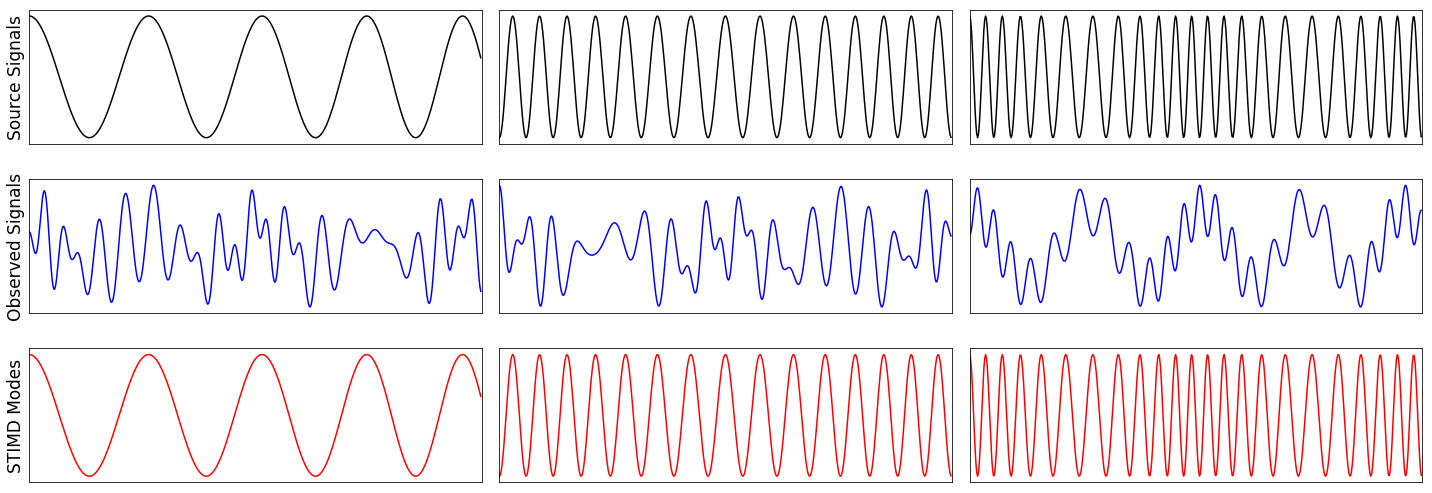

In [4]:
# Plot the source signals, observed signals, and STIMD modes
plt.figure('Test 1',figsize=(20,7))
colors = ['k','b','r']
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.plot(S[i,:N//2],colors[0])
    plt.xticks([])
    plt.yticks([])
    plt.xlim([0,N//2])
    if i==0: plt.ylabel('Source Signals',fontsize=17)
    plt.subplot(3,3,i+3+1)
    plt.plot(X[i,:N//2],colors[1])
    plt.xticks([])
    plt.yticks([])
    plt.xlim([0,N//2])
    if i==0: plt.ylabel('Observed Signals',fontsize=17)
    plt.subplot(3,3,i+6+1)
    plt.plot(stimd.S_[i,:N//2],colors[2])
    plt.xticks([])
    plt.yticks([])
    if i ==0: plt.ylabel('STIMD Modes',fontsize=17)
    plt.xlim([0,N//2])

plt.tight_layout()